# Case Study on Microns embeddings

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [26]:
import pickle
import pandas as pd
import numpy as np
import corc.graph_metrics.neb
import corc.utils
import corc
import corc.tmm_plots

import sklearn.datasets
from corc import complex_datasets

In [3]:
!!pwd

['/Users/martin/git/cluster_vs_continuum/notebooks/paper_figures']

In [6]:
varied = sklearn.datasets.make_blobs(
                n_samples=1000, cluster_std=[1.0, 2.5, 0.5], random_state=30
)
X, y = varied

In [27]:
std = 0.075
blobs2_0 = complex_datasets.make_gaussians(
    dim=8,
    std=std * np.sqrt(8),
    n_samples=1000,
    equal_sized_clusters=False,
)
X,y = blobs2_0

In [28]:
tmm_model = corc.graph_metrics.neb.NEB(
    data=X,
    labels=y,
    n_components=30,
    optimization_iterations=30,
    seed=42,
)
tmm_model.fit(X)

[[   8 4216]
 [  22  250]
 [  11  459]
 [  23   64]
 [  45  130]
 [  49   70]
 [  13  647]
 [  15  767]
 [  18  270]
 [  15  931]
 [  25  525]
 [  30  157]
 [  21  225]
 [  68    4]
 [  24  173]
 [  26  277]
 [  59    7]
 [  53   52]
 [  30  216]
 [   6  720]
 [  69   27]
 [  13  411]
 [  18  426]
 [  23   65]
 [  55   53]
 [  27  197]
 [  94   11]
 [  44   12]
 [  62    5]
 [  34  185]]
After filtering 30 components, we are left with 28 components
[[ 22 250]
 [ 11 459]
 [ 23  64]
 [ 45 130]
 [ 49  70]
 [ 13 647]
 [ 15 767]
 [ 18 270]
 [ 16 931]
 [ 25 525]
 [ 30 157]
 [ 21 225]
 [ 70   4]
 [ 24 173]
 [ 26 277]
 [ 59   7]
 [ 54  52]
 [ 30 216]
 [ 69  27]
 [ 13 411]
 [ 18 426]
 [ 23  65]
 [ 56  53]
 [ 27 197]
 [ 94  11]
 [ 49  12]
 [ 66   5]
 [ 34 185]]


tmm: 100%|██████████| 378/378 [04:43<00:00,  1.33it/s]


In [29]:
tmm_model2 = corc.graph_metrics.neb.NEB(
    data=X,
    labels=y,
    n_components=30,
    optimization_iterations=30,
    seed=30,
)
tmm_model2.fit(X)

[[  28   37]
 [  46   17]
 [  34  108]
 [  16  438]
 [  18  240]
 [ 166    8]
 [  22  370]
 [  40   70]
 [  50   18]
 [  42  134]
 [  39   33]
 [  30  288]
 [  26   59]
 [  31   90]
 [  23  239]
 [  25   21]
 [   6  604]
 [  41  215]
 [  38   21]
 [  35   96]
 [  23   63]
 [  15 1145]
 [  33   44]
 [  16  675]
 [  50   45]
 [   8  653]
 [  29   86]
 [  22  598]
 [  32  239]
 [  16 1013]]
After filtering 30 components, we are left with 28 components
[[  28   37]
 [  47   17]
 [  34  108]
 [  16  438]
 [  18  240]
 [ 166    8]
 [  22  370]
 [  40   70]
 [  53   18]
 [  42  134]
 [  43   33]
 [  30  288]
 [  26   59]
 [  31   90]
 [  23  239]
 [  25   21]
 [  43  215]
 [  38   21]
 [  35   96]
 [  26   63]
 [  15 1145]
 [  34   44]
 [  16  675]
 [  50   45]
 [  29   86]
 [  22  598]
 [  32  239]
 [  16 1013]]


tmm: 100%|██████████| 378/378 [04:25<00:00,  1.43it/s]


In [13]:
num_clusters = tmm_model2.n_components
file_path = "../../cache/blobs2_tmm_{num_clusters}.pickle"
with open(file_path, 'wb') as file:
    pickle.dump(tmm_model2, file)

In [17]:
file_path_20 = "../../cache/microns_tmm.pickle"
with open(file_path_20, 'rb') as file:
    tmm_model_20 = pickle.load(file)

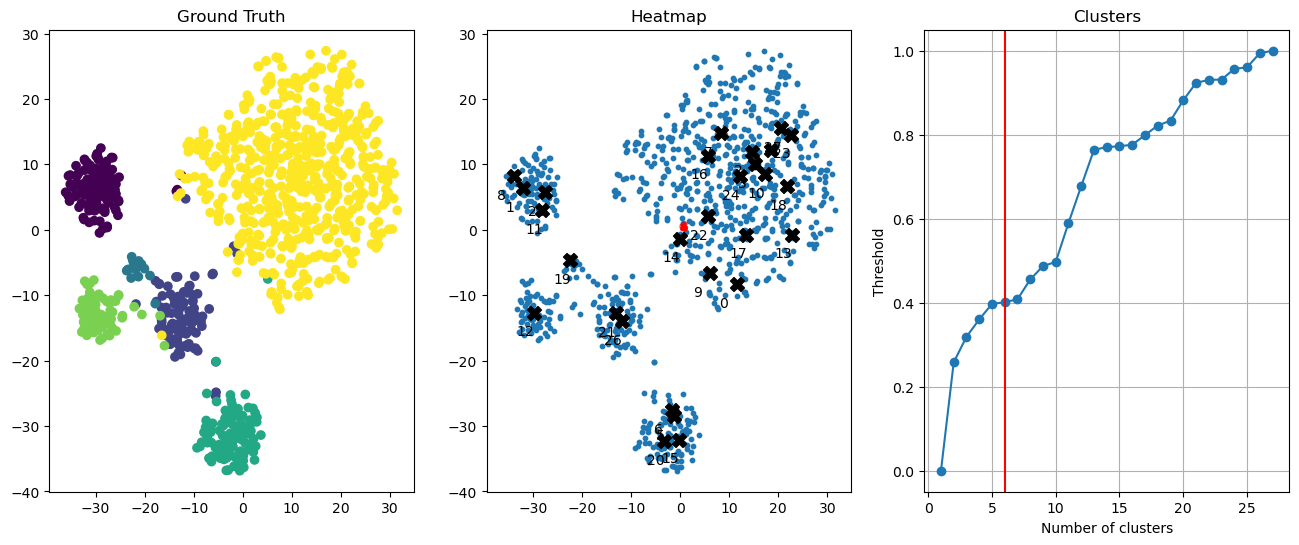

In [30]:
corc.tmm_plots.plot_row(X,y,tmm_model)

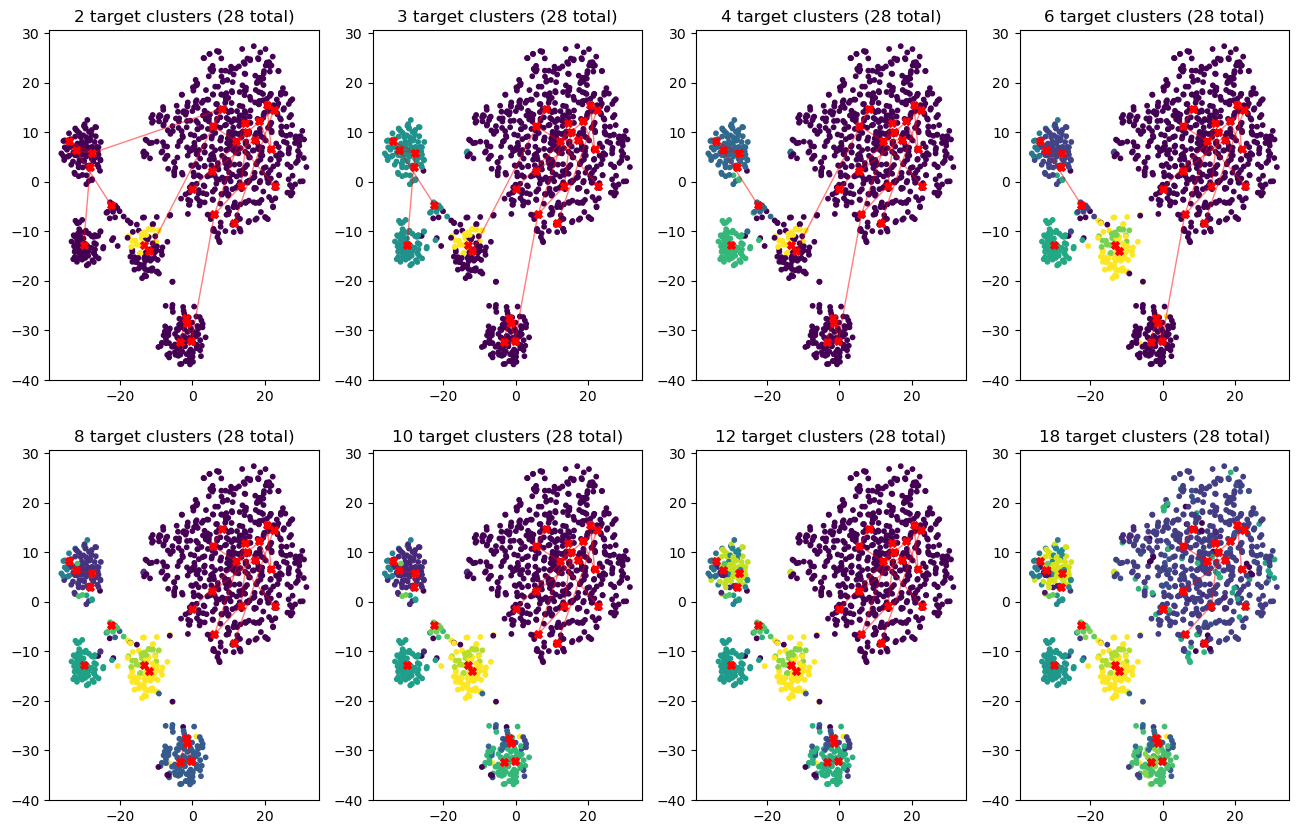

In [31]:
corc.tmm_plots.plot_cluster_levels([2,3,4,6,8,10,12,18], tmm_model, X, )

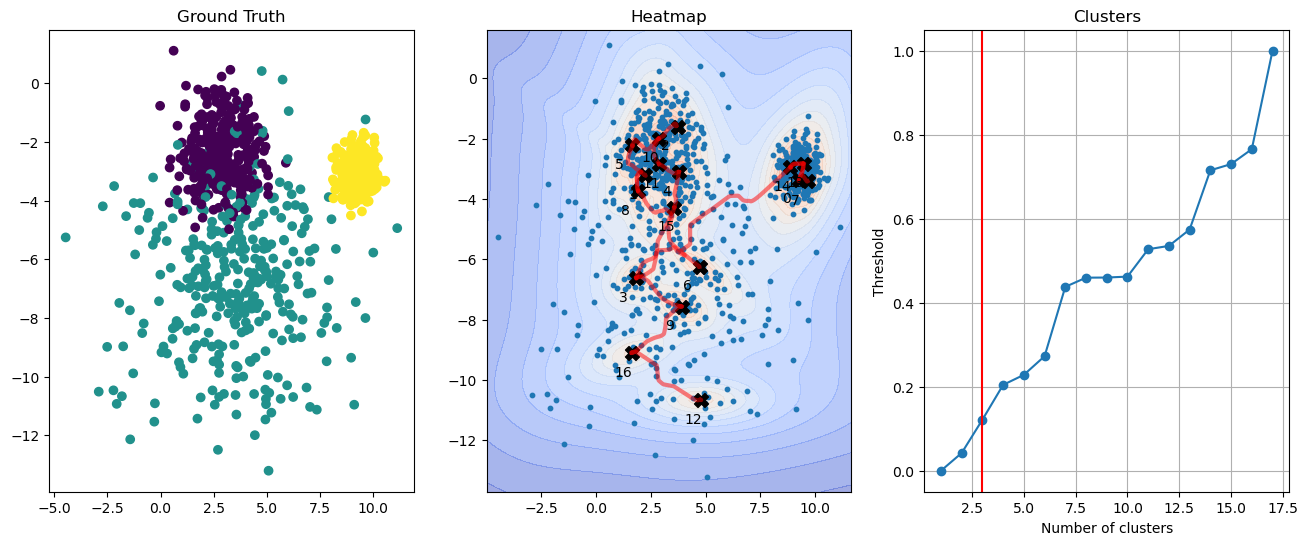

In [24]:
corc.tmm_plots.plot_row(X,y,tmm_model2)

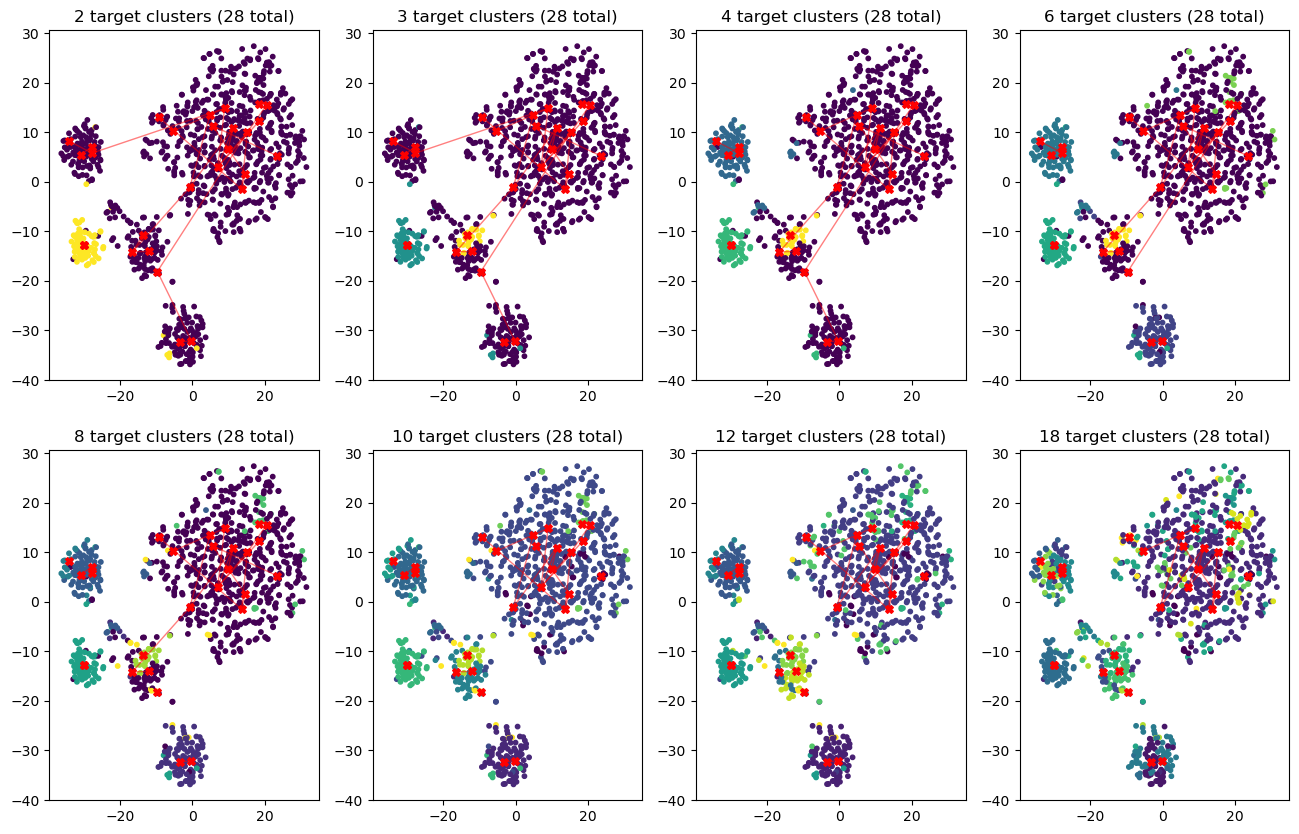

In [32]:
corc.tmm_plots.plot_cluster_levels([2,3,4,6,8,10,12,18], tmm_model2, X, )
